In [1]:
import os, pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

import warnings
warnings.filterwarnings("ignore")

import evals.embed_evals as evals
import pickle
import utils
bm_y_train = np.array([0]*80+[1]*80)
bm_y_valid = np.array([0]*20+[1]*20)
bird_y_train = np.array([0]*240+[1]*240+[2]*240+[3]*240)
bird_y_valid = np.array([0]*30+[1]*30+[2]*30+[3]*30)
import plot_data as plot
import seaborn as sns

In [4]:
import torch
from torch import nn
pdist = nn.PairwiseDistance()

In [5]:

wv_x_train = pickle.load(open("/net/scratch/tianh/explain_teach/embeds/wv/train.pkl","rb"))
wv_x_test = pickle.load(open("/net/scratch/tianh/explain_teach/embeds/wv/test.pkl","rb"))
d = pdist(torch.tensor(wv_x_test), torch.tensor(wv_x_train))

RuntimeError: The size of tensor a (40) must match the size of tensor b (120) at non-singleton dimension 0

In [2]:
wv_y_train = np.array([0]*60+[1]*60)
wv_y_test = np.array([0]*20+[1]*20)
wv_x_train = pickle.load(open("/net/scratch/tianh/explain_teach/embeds/wv/train.pkl","rb"))
wv_x_test = pickle.load(open("/net/scratch/tianh/explain_teach/embeds/wv/test.pkl","rb"))

In [13]:
MTL_train = pickle.load(open("/net/scratch/tianh/explain_teach/embeds/wv/MTL_train_emb10_lambda_1.pkl","rb"))
MTL_test = pickle.load(open("/net/scratch/tianh/explain_teach/embeds/wv/MTL_test_emb10_lambda_1.pkl","rb"))
examples = evals.class_1NN_idx(MTL_train, wv_y_train, MTL_test, wv_y_test)
evals.decision_support(wv_x_train, wv_y_train, wv_x_test, wv_y_test, examples)

0.85

In [3]:
MTL_train = pickle.load(open("/net/scratch/tianh/explain_teach/embeds/wv/MTL_train_emb10.pkl","rb"))
MTL_test = pickle.load(open("/net/scratch/tianh/explain_teach/embeds/wv/MTL_test_emb10.pkl","rb"))
examples = evals.class_1NN_idx(MTL_train, wv_y_train, MTL_test, wv_y_test)
evals.decision_support(wv_x_train, wv_y_train, wv_x_test, wv_y_test, examples)

1.0

In [4]:
TN_train = pickle.load(open("/net/scratch/tianh/explain_teach/embeds/wv/TN_train_emb10.pkl","rb"))
TN_test = pickle.load(open("/net/scratch/tianh/explain_teach/embeds/wv/TN_test_emb10.pkl","rb"))
examples = evals.class_1NN_idx(TN_train, wv_y_train, TN_test, wv_y_test)
evals.decision_support(wv_x_train, wv_y_train, wv_x_test, wv_y_test, examples)

0.975

In [5]:
RESN_train = pickle.load(open("/net/scratch/tianh/explain_teach/embeds/wv/RESN_train_emb10.pkl","rb"))
RESN_test = pickle.load(open("/net/scratch/tianh/explain_teach/embeds/wv/RESN_test_emb10.pkl","rb"))
examples = evals.class_1NN_idx(RESN_train, wv_y_train, RESN_test, wv_y_test)
evals.decision_support(wv_x_train, wv_y_train, wv_x_test, wv_y_test, examples)

0.825

In [8]:
p2i_train = pickle.load(open("/net/scratch/chacha-shared/weevil_vespula/p2i.pkl","rb"))
p2i_valid = pickle.load(open("/net/scratch/chacha-shared/weevil_vespula/p2i_valid.pkl","rb"))
p2i_test = pickle.load(open("/net/scratch/chacha-shared/weevil_vespula/p2i_test.pkl","rb"))
p2i_train = {int(p):i for p,i in p2i_train.items()}
p2i_valid = {int(p):i for p,i in p2i_valid.items()}
p2i_test = {int(p):i for p,i in p2i_test.items()}
i2p_train = {i:p for p,i in p2i_train.items()}
i2p_valid = {i:p for p,i in p2i_valid.items()}
i2p_test = {i:p for p,i in p2i_test.items()}
train_idx = list(p2i_train.keys())
valid_idx = list(p2i_valid.keys())
test_idx = list(p2i_test.keys())
selected_features = ["bodyheadszratio","bodyheadcolordiff"]

In [10]:
wv_df

,label,name,index,3,bodyheadszratio,bodyheadcolordiff,bodysz,bodycolor,bodycolorlighter
0,0,weevil,0,0,0.33,0.15,0.65,0.12,0.0
1,0,weevil,1,1,0.25,0.05,0.65,0.18,0.0
2,0,weevil,2,2,0.38,0.14,0.54,0.06,0.0
3,0,weevil,3,3,0.38,0.22,0.55,0.05,0.0
4,0,weevil,4,4,0.43,0.00,0.43,0.13,1.0
...,...,...,...,...,...,...,...,...,...
195,1,vespula,195,195,0.62,0.30,0.47,0.23,0.0
196,1,vespula,196,196,0.58,0.55,0.53,0.20,1.0
197,1,vespula,197,197,0.80,0.35,0.52,0.22,1.0
198,1,vespula,198,198,0.45,0.63,0.39,0.14,1.0


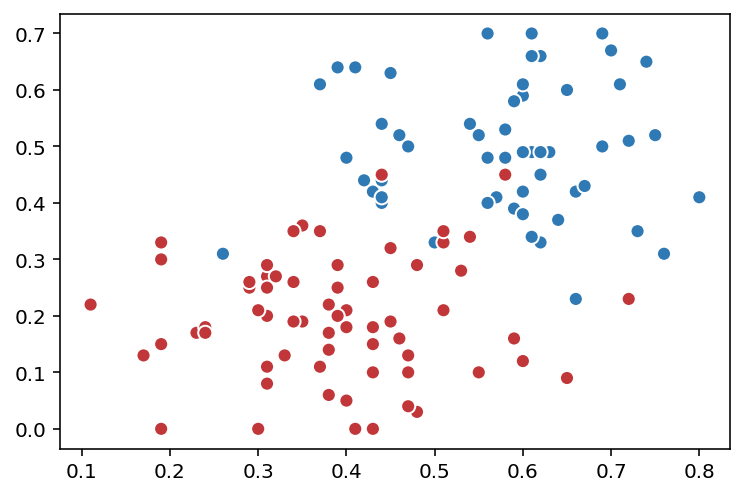

In [11]:
wv_df = evals.get_wv_df()
train_df = wv_df.iloc[train_idx]
valid_df = wv_df.iloc[valid_idx]
test_df = wv_df.iloc[test_idx]
plt.scatter(train_df[selected_features[0]],train_df[selected_features[1]], c=train_df['label'], s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

In [6]:
train_embeds = []
for i,p in i2p_train.items():
    row = wv_df.iloc[p]
    z = [row[selected_features[0]], row[selected_features[1]]]
    train_embeds.append(z)
train_embeds = np.array(train_embeds)

valid_embeds = []
for i,p in i2p_valid.items():
    row = wv_df.iloc[p]
    z = [row[selected_features[0]], row[selected_features[1]]]
    valid_embeds.append(z)
valid_embeds = np.array(valid_embeds)

test_embeds = []
for i,p in i2p_test.items():
    row = wv_df.iloc[p]
    z = [row[selected_features[0]], row[selected_features[1]]]
    test_embeds.append(z)
test_embeds = np.array(test_embeds)

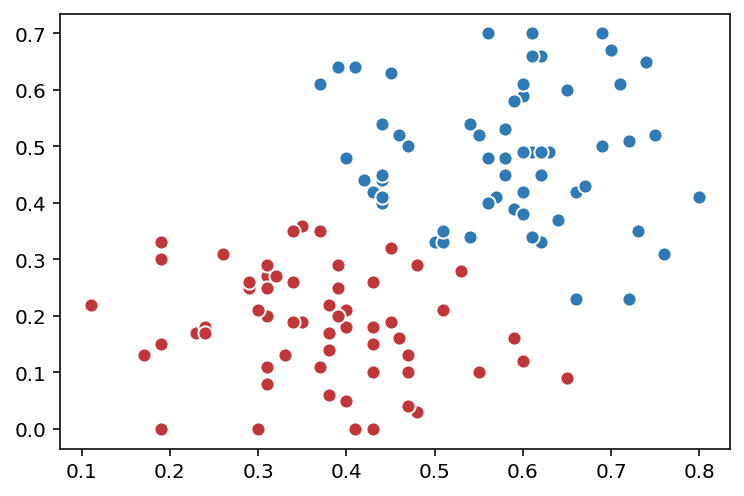

In [9]:
wv_y_train = np.array([0]*60+[1]*60)
wv_y_test = np.array([0]*20+[1]*20)
for i,y in enumerate(wv_y_train):
    plt.scatter(train_embeds[i][0], train_embeds[i][1], c=y,s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)